In [60]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



In [61]:
file_path = 'dataset2'

In [62]:
name_class = os.listdir(file_path)
name_class

['Bacterial_Pnemonia', 'Normal', 'Viral _Pneumonia']

In [63]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [64]:
filepaths

['dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-10.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-100.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1000.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1001.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1002.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1003.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1004.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1005.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1006.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1007.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1008.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1009.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-101.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1010.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1011.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1012.png',
 'dataset2\\Bacterial_Pnemonia\\Lung_Opacity-1013.png',

In [65]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial_Pnemonia',
 'Bacterial

In [66]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,dataset2\Bacterial_Pnemonia\Lung_Opacity-1451.png,Bacterial_Pnemonia
1,dataset2\Normal\Normal-692.png,Normal
2,dataset2\Normal\Normal-1784.png,Normal
3,dataset2\Normal\Normal-76.png,Normal
4,dataset2\Bacterial_Pnemonia\Lung_Opacity-1576.png,Bacterial_Pnemonia


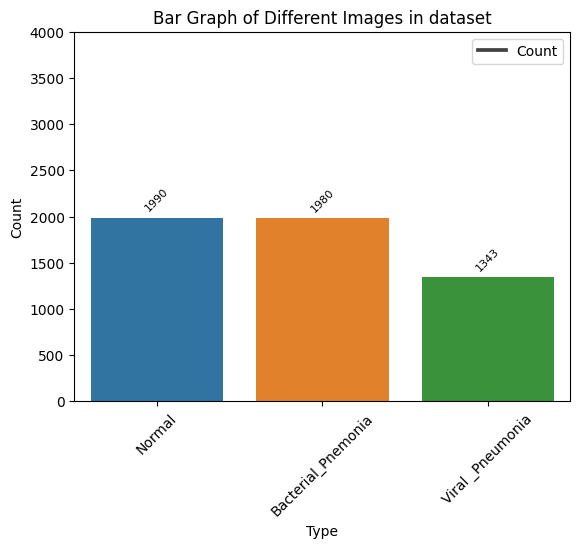

In [67]:
# Get the counts of each label
counts = data['Label'].value_counts()

# Create a bar plot and get the ax object
ax = sns.barplot(x=counts.index, y=counts)

# Set labels and rotate x-axis labels for better readability
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Display the head of the bar graph
plt.title('Bar Graph of Different Images in dataset')

# Extend y-axis range
ax.set(ylim=(0, 4000))  # Adjust ylim as needed for your data

# Add legend
ax.legend(labels=['Count'])

# Add count values on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', rotation=45, fontsize=8)

# Display the plot
plt.show()

In [68]:
from sklearn.model_selection import train_test_split


In [69]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

In [70]:
import tensorflow

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

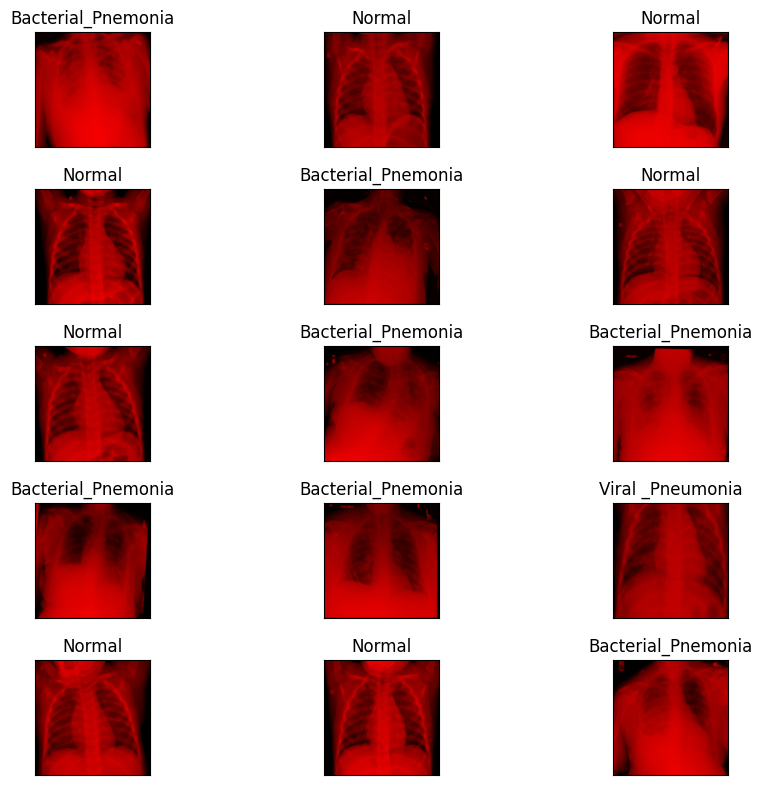

In [72]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [73]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [74]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 3984 validated image filenames belonging to 3 classes.
Found 1329 validated image filenames belonging to 3 classes.
Found 1329 validated image filenames belonging to 3 classes.


In [75]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (100, 100, 3)

# Specify the path to your locally downloaded weights file
weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Create ResNet50 model without top layers and load weights from the local path
pretrained_model = ResNet50(
    input_shape=input_shape,
    include_top=False,
    weights=None  # Weights will be loaded manually
)

# Load the weights from your local path
pretrained_model.load_weights(weights_path)

# Set all layers in the model as not trainable
for layer in pretrained_model.layers:
    layer.trainable = False

# Add custom dense layers
x = GlobalAveragePooling2D()(pretrained_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Output layer
outputs = Dense(3, activation='softmax')(x)  # Assuming 3 classes, replace with your actual number of classes

# Create the updated model
model = Model(inputs=pretrained_model.input, outputs=outputs)

In [76]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [77]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [101]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=30,
)

Epoch 1/30
125/125 [==============================] - 148s 1s/step - loss: 2.2019e-04 - accuracy: 1.0000 - val_loss: 0.5329 - val_accuracy: 0.9217
Epoch 2/30
125/125 [==============================] - 183s 1s/step - loss: 1.8695e-04 - accuracy: 1.0000 - val_loss: 0.5389 - val_accuracy: 0.9233
Epoch 3/30
125/125 [==============================] - 164s 1s/step - loss: 1.6003e-04 - accuracy: 1.0000 - val_loss: 0.5470 - val_accuracy: 0.9225
Epoch 4/30
125/125 [==============================] - 159s 1s/step - loss: 1.4423e-04 - accuracy: 1.0000 - val_loss: 0.5550 - val_accuracy: 0.9225
Epoch 5/30
125/125 [==============================] - 159s 1s/step - loss: 1.2249e-04 - accuracy: 1.0000 - val_loss: 0.5609 - val_accuracy: 0.9248
Epoch 6/30
125/125 [==============================] - 160s 1s/step - loss: 1.1455e-04 - accuracy: 1.0000 - val_loss: 0.5679 - val_accuracy: 0.9225
Epoch 7/30
125/125 [==============================] - 160s 1s/step - loss: 1.0133e-04 - accuracy: 1.0000 - val_loss: 0

In [86]:
model.save("model_resnet50.h5")  

C:\Users\himas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


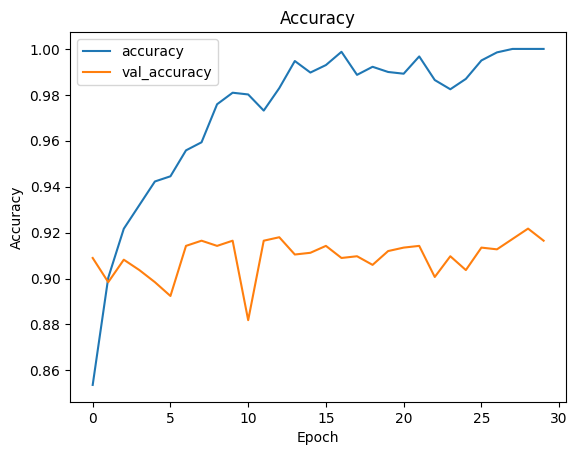

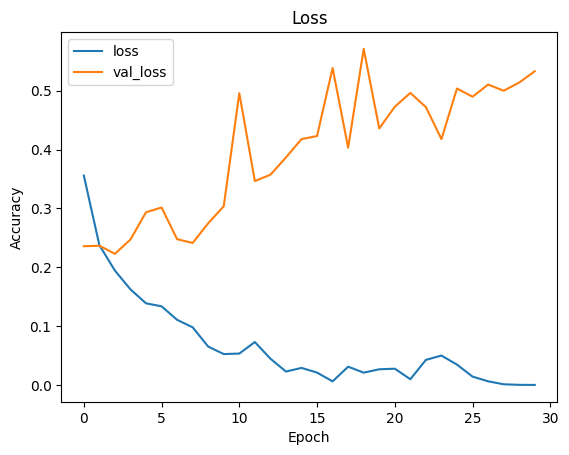

In [87]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [89]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.53286
Test Accuracy: 91.65%


In [90]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [91]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                    precision    recall  f1-score   support

Bacterial_Pnemonia       0.90      0.93      0.92       494
            Normal       0.91      0.87      0.89       493
  Viral _Pneumonia       0.95      0.96      0.95       342

          accuracy                           0.92      1329
         macro avg       0.92      0.92      0.92      1329
      weighted avg       0.92      0.92      0.92      1329



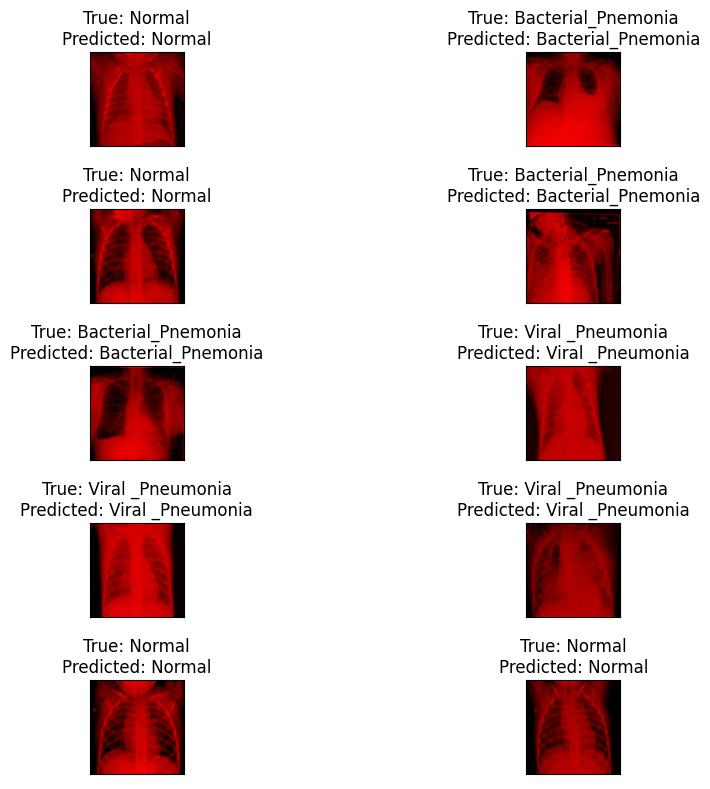

In [92]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [99]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'Lung_Opacity-29.png'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)
# Define your labels
labels = ["bacterial_pneumonia", "normal", "viral_pneumonia"]

# Find the index with the highest percentage
max_index = np.argmax((result*100).astype('int'))

# Print the corresponding label
print("Predicted Label:", labels[max_index])


[[99  0  0]]
Predicted Label: bacterial_pneumonia
